In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as scp

%matplotlib inline

In [20]:
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scp.expit(x)
    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [21]:
# количество входных, скрытых и выходных узлов
input_nodes = 784
hidden_nodes = 200
output_nodes = 10
# коэффициент обучения равен 0,3
learning_rate = 0.3

# создать экземпляр нейронной сети
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

In [22]:
with open('minidata/mnist_train_100.csv') as f:
    data_list = f.readlines()

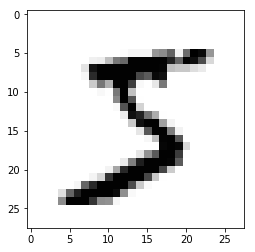

In [23]:
all_values = data_list[0].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28, 28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

In [24]:
all_values[0]

'5'

In [25]:
scaled_input = (np.asfarray(all_values[1:]) / 255.0 * .99) + .01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [47]:
# load the mnist training data CSV file into a list
with open("bigdata/mnist_train.csv") as f:
    training_data_list = f.readlines()

In [48]:
%%time
# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.strip('\n').split(',')
        # scale and shift the inputs
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = np.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)

CPU times: user 35min 35s, sys: 43min 35s, total: 1h 19min 11s
Wall time: 20min 47s


In [50]:
with open('weights.txt', 'w') as f:
    f.write(f'wih {n.wih} \n who {n.who}')

In [49]:
f'wih {n.wih} \n who {n.who}'

'wih [[-0.03957323  0.01774358 -0.1069615  ... -0.10775824 -0.1205256\n  -0.09392968]\n [-0.03326133 -0.02516419  0.00369639 ... -0.03345098 -0.00756963\n  -0.02068809]\n [ 0.02768148  0.00657413  0.01475789 ...  0.02852675 -0.0186935\n  -0.05232721]\n ...\n [-0.07197541 -0.02008425 -0.10528773 ... -0.09112555 -0.10621344\n  -0.12609119]\n [-0.04722369 -0.01863138 -0.03680029 ... -0.04054858 -0.06153648\n  -0.0315803 ]\n [-0.03227946  0.00393936 -0.06569755 ... -0.0602325  -0.02491414\n  -0.01887764]] \n who [[ 0.1045347  -0.05600577  0.00226131 ...  0.65488643 -0.08740587\n  -0.10262585]\n [-0.94532068 -0.13074437 -0.02672479 ... -0.54491421 -0.1506978\n  -0.62893219]\n [-0.77973473  0.05878584 -0.27883067 ... -0.67712366 -2.16936248\n   0.35311455]\n ...\n [-1.30734619  0.86983317 -0.07378125 ... -1.01617441 -0.89570833\n  -0.5297515 ]\n [-0.75165003 -0.49363475 -0.23757597 ...  0.99806135 -1.02219501\n   0.13140067]\n [ 1.62219256 -0.92704191 -0.07585833 ... -1.28902623 -1.01818449\

In [51]:
# load the mnist test data CSV file into a list
with open("bigdata/mnist_test.csv") as f:
    test_data_list = f.readlines()

In [52]:
%%time
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []
np.asfarray
# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.strip('\n').split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = np.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)

CPU times: user 14.6 s, sys: 17.6 s, total: 32.2 s
Wall time: 8.89 s


In [53]:
# рассчитать показатель эффективности в виде
# доли правильных ответов
scorecard_array = np.asarray(scorecard)
print ("эффективность = ", scorecard_array.sum() /scorecard_array.size)

эффективность =  0.9582


In [58]:
import tqdm
import time

In [59]:
for i in tqdm.tqdm(range(5)):
    time.sleep(2)

100%|██████████| 5/5 [00:10<00:00,  2.01s/it]


In [61]:
for i in tqdm.trange(5):
    time.sleep(2)

100%|██████████| 5/5 [00:10<00:00,  2.01s/it]
